# TP Statistique MDI720
## Introduction à Pandas, Matplotlib, etc.

In [1]:
# packages:

from os import path
import sys
import urllib
import zipfile

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as dates
plt.style.use('seaborn')

On utilise la base de données **Individual Household electric power consumption Data Set**.  
> Documentation: *https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption*

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
location = url + zipfilename

# testing existence of file:
if sys.version_info >= (3, 0):
    if not(path.isfile('zipfilename')):
        urllib.request.urlretrieve(location, zipfilename)
    else:
        if not(path.isfile('zipfilename')):
            urllib.urlretrieve(location, zipfilename)

# unzip part:
zip = zipfile.ZipFile(zipfilename)
zip.extractall()

# convert into DataFrame object:
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df_pwCons = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
                        na_values=na_values, usecols=fields)

#### 1) Détecter et dénombrer le nombre de lignes ayant des valeurs manquantes.

In [3]:
df_pwCons.isnull().sum()

Date                      0
Time                      0
Global_active_power    3732
dtype: int64

> 3732 valeurs NaN sont dénombrées dans le relevé de consommation de la base de données *'household_power_consumption'*.

In [4]:
# convert 'Date' and 'Time' features into np.Datetime64 objects:
datetime = df_pwCons['Date'] + ' ' + df_pwCons['Time']
strptime = '%d/%m/%Y %H:%M:%S'
df_pwCons['Datetime'] = pd.to_datetime(arg=datetime, format=strptime,
                                       errors='raise')
# set the np.Datetime64 object as DataFrame index:
df_pwCons.set_index(['Datetime'], inplace=True)
# drop 'Date' and 'Time' columns:
df_pwCons.drop(df_pwCons[['Date', 'Time']], 1, inplace=True)
df_pwCons.describe()

,Global_active_power
count,196268.000000
mean,1.352544
std,1.280684
min,0.104000
25%,0.314000
50%,1.072000
75%,1.992500
max,10.670000


Les statistiques descriptives n'affichent pas de valeurs aberrantes dans le jeu de données.

La valeur de relevé la plus élevée dans la consommation des ménages est de 640,2 kW/h (= 10,67 kW/min * 60).  
Compte-tenu du peu d'informations mis à disposition sur l'origine de la donnée, aucune conclusion ne pourra être retenue sur la nature de cette valeur extrême.

In [5]:
# filter on the observations with NaN values between January and March 2007:
dt1 = '2007-01-01 00:00:00'
dt2 = '2007-04-30 23:59:00'
df_pwCons[df_pwCons['Global_active_power'].isnull()].loc[dt1:dt2]

,Global_active_power
Datetime,
2007-01-14 18:36:00,NaN
2007-01-28 17:13:00,NaN
2007-02-22 22:58:00,NaN
2007-02-22 22:59:00,NaN
2007-03-25 17:52:00,NaN
2007-04-28 00:21:00,NaN
2007-04-28 00:22:00,NaN
2007-04-28 00:23:00,NaN
2007-04-28 00:24:00,NaN


In [6]:
# filter on the observations with NaN values in April 2007:
dt1 = '2007-04-28 00:00:00'
dt2 = '2007-04-30 23:59:00'
var = 'Global_active_power'
NaN_apr07 = len(df_pwCons[df_pwCons[var].isnull()].loc[dt1:dt2])
print('Number of NaN values in April 2007: %s' % str(NaN_apr07))

Number of NaN values in April 2007: 3723


> Sur la période entre le 1er janvier et le 30 avril 2007, dans le relevé à la fréquence minute:
- 2 observations sont manquantes en janvier,
- 2 observations sont manquantes en février,
- 1 observations est manquante en mars,
- 3723 observations sont manquantes en avril, entre le 28 et le 30.

> Ces valeurs NaN ne perturberont pas l'analyse de l'évolution de la consommation entre janvier et avril, car mis à part les deux derniers jours d'avril, le jeu de données est relativement complet.

#### 2) Supprimer toutes les lignes ayant des valeurs manquantes.

In [7]:
dt1 = '2007-01-01 00:00:00'
dt2 = '2007-04-30 23:59:00'
df_pwCons = df_pwCons[pd.notnull(df_pwCons['Global_active_power'])]
print('Number of observations left: %s' % str(df_pwCons.loc[dt1:dt2].shape[0]))

Number of observations left: 169072


#### 3) Utiliser **to_datetime** et **set_index** pour créer une *Time_Series*.

> --> voir code en *In [4]:*

#### 4) Afficher le graphique des moyennes journalières entre le 1er janvier et le 30 avril 2007. Proposer une cause expliquant la consommation fin février et début avril. 

In [8]:
# get daily average between the 1st of jan, 2007 and the 30 of apr, 2007:
df_dailyAvg = df_pwCons.resample('D').mean().loc['2007-01-01':'2007-04-30']
df_dailyAvg.head()

,Global_active_power
Datetime,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281


> Les creux de consommations fin février et début avril peuvent s'être produits pour différentes raisons:
- période de vacances scolaires (vacances d'hiver et de pâques) --> habitats laissés vacants.
- remontée des températures mi-avril (passage de 5°C à 20°C entre le 1er et le 15 avril) --> réduction de l'usage du chauffage électrique.
- qualité du jeu de données? --> le compteur du relevé électrique a pu connaitre une défaillance sur ces périodes.

> Comme précisé dans l'énoncé, on ne connait pas le lieu de relevé dans la base de données *'Household Active Power'*. Par conséquent, il est délicat de se prononcer sur une corrélation entre la température et la consommation électrique des ménages en France.

> --> voir graphique en *Out [11]:*

#### On va maintenant ajouter des informations de température pour cette étude. Les données utilisées sont disponibles sur EOLE dans *"TGSTAID011249.txt"*. Ici les températures sont celles d'Orly.

#### 5) Charger les données avec **pandas**, et ne garder que les colonnes **DATE¨** et **TG**. Diviser par 10 la colonne TG pour obtenir des températures en degré Celsius. Traiter les éléments de températures aberrants comme des NaN.

> Jeu de données:  
*'Daily dataset of 20th-century surface air temperature and precipitation series for ORLY, FRANCE'*

In [9]:
# import file 'TGSTAID011249.txt':
filename = 'TGSTAID011249'
na_values = ['-9999']
df_temperatures = pd.read_table(filename + '.txt', sep=',',
                                skiprows=20, na_values=na_values)
# strip column headers:
df_temperatures.columns = df_temperatures.columns.str.strip()
# keep 'DATE' and 'TG' features:
df_temperatures = df_temperatures[['DATE', 'TG']]
# rename column headers:
df_temperatures.columns = ['Datetime', 'Temperature']
# convert 'DATE' feature to np.datetime64 object:
df_temperatures['Datetime'] = pd.to_datetime(df_temperatures['Datetime'],
                                             format='%Y%m%d',
                                             errors='raise')
# convert'TG' feature to °C unit (0.1°C by default):
df_temperatures['Temperature'] /= 10
# set the np.Datetime64 object as DataFrame index:
df_temperatures = df_temperatures.set_index('Datetime')
# filter between the 1st of jan, 2007 and the 30 of apr, 2007:
df_temperatures = df_temperatures.loc['2007-01-01':'2007-04-30']
df_temperatures.describe()

,Temperature
count,120.000000
mean,9.656667
std,4.420782
min,-1.400000
25%,7.575000
50%,9.300000
75%,11.325000
max,20.400000


> Pas de valeur extrême aberrante dans le jeu de données.

In [10]:
df_temperatures.isnull().sum()

Temperature    0
dtype: int64

> Pas de valeur manquante dans le jeu de données.

In [11]:
# merge the two DataFrames 'Daily Power Consumption' and 'Daily Temperature':
df_merge = pd.concat([df_dailyAvg, df_temperatures], axis=1, join='inner')
df_merge.head()

,Global_active_power,Temperature
Datetime,,
2007-01-01,1.909031,9.6
2007-01-02,0.881414,6.0
2007-01-03,0.704204,6.1
2007-01-04,2.263481,9.2
2007-01-05,1.884281,10.0


#### 6) Créer une Time Series pandas des températures journalières entre le 1er janvier et le 30 avril 2007. Afficher sur un même graphique ces températures et la Time Series **Global_active_power**.

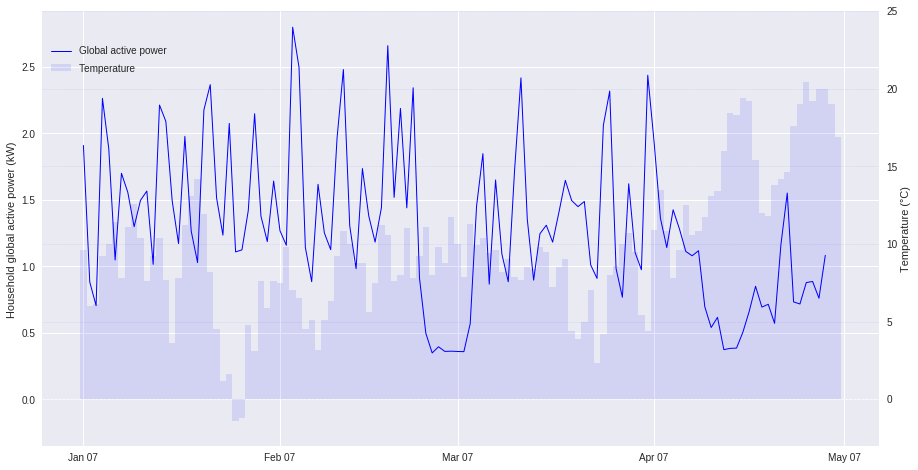

In [12]:
# Create matplotlib figure:

fig, ax = plt.subplots(figsize=(15, 8))

# Plot time serie:
ax.plot(df_merge.index, df_merge.Global_active_power,
        label='Global active power', color='blue', linewidth=1)
ax.set_ylabel('Household global active power (kW) ')
ax.set_ylim(-0.35, None)
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b %y'))

# Create another axes that shares the same x-axis as ax.
ax2 = ax.twinx()
ax2.set_ylabel('Temperature (°C)')
ax2.set_ylim(-3, 25)
# Append barplot:
ax2.bar(df_merge.index, df_merge.Temperature, width=1,
        alpha=0.1, color='blue', label='Temperature')
ax2.grid(color='blue', linestyle=':', linewidth=0.5, alpha=0.2)

# Place a legend to the upper left of the plot.
ax.legend(bbox_to_anchor=(0., 0.94), loc='upper left')
ax2.legend(bbox_to_anchor=(0., 0.90), loc='upper left')

#### On considère maintenant le jeu de données '20080421_20160927-PA13_auto.csv' sur EOLE.

In [13]:
# import 'AirParif - Air quality meter' dataset:

filename = '20080421_20160927-PA13_auto'
na_values = ['n/d', '']
fields = ['date', 'heure', 'NO2', 'O3']
df_airParif = pd.read_csv(filename + '.csv', sep=';', nrows=200000,
                          na_values=na_values, usecols=fields)
# drop first row after header (#comments):
df_airParif = df_airParif.drop(df_airParif.index[0])
# translate the 24th hour into the hour 0 (i.e. midnight):
df_airParif['heure'] = df_airParif['heure'].apply(lambda h: str(int(h % 24)))
# convert 'DATE' feature to np.datetime64 object:
datetime = df_airParif['date'] + ' ' + df_airParif['heure']
strptime = '%d/%m/%Y %H'
df_airParif['date'] = pd.to_datetime(arg=datetime,
                                     errors='raise', format=strptime)
# set the np.Datetime64 object as DataFrame index:
df_airParif.set_index(['date'], inplace=True)
# convert 'NO2' and 'O3' features to numeric:
df_airParif.NO2 = pd.to_numeric(df_airParif.NO2, errors='coerce')
df_airParif.O3 = pd.to_numeric(df_airParif.O3, errors='coerce')
df_airParif = df_airParif.drop('heure', 1).sort_index()
df_airParif.describe()

,NO2,O3
count,71008.000000,71452.000000
mean,34.453414,39.610046
std,20.380702,28.837333
min,1.000000,0.000000
25%,19.000000,16.000000
50%,30.000000,38.000000
75%,46.000000,58.000000
max,167.000000,211.000000


> Pas de valeur extrême aberrante dans le jeu de données.

In [14]:
# store in dictionary number of NaN values per year:
list_years = list(set(df_airParif.index.year))
list_NaN = [len(df_airParif[df_airParif.isnull()].loc[str(year)+'-01-01 00:00:00':str(year)+'-12-31 23:59:00'])
            for year in list_years]
df_NaNperYear = pd.DataFrame( {'Date': list_years, 'Number of NaN': list_NaN} )
df_NaNperYear.set_index(['Date'], inplace=True)
df_NaNperYear.sort_index()

,Number of NaN
Date,
2008,6120
2009,8760
2010,8760
2011,8712
2012,8784
2013,8760
2014,8760
2015,8760
2016,6504


> Nombre quasi équivalent de valeurs NaN pour chaque année dans le jeu de données.

In [15]:
# append maximum values per year:

years = df_airParif.index.year
df_yearly = df_airParif.groupby(years).mean()
df_yearly['NO2_max'] = df_airParif['NO2'].groupby(years).max()
df_yearly['O3_max'] = df_airParif['O3'].groupby(years).max()
df_yearly.head()

,NO2,O3,NO2_max,O3_max
date,,,,
2008,34.624102,39.830797,133.0,170.0
2009,38.401470,40.287643,167.0,186.0
2010,37.629090,38.020582,157.0,182.0
2011,35.040826,37.887899,160.0,173.0
2012,34.111086,37.115905,150.0,203.0


#### 7) Proposer une visualisation de la pollution moyenne par année.

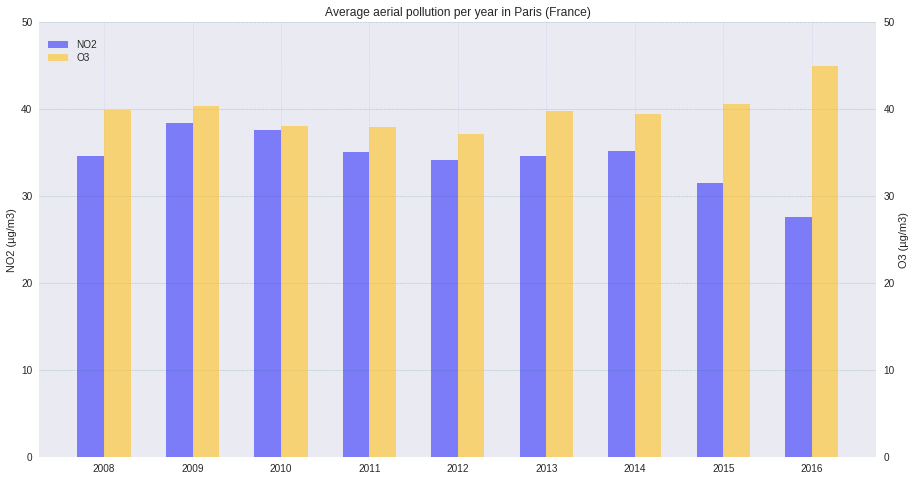

In [16]:
# Create matplotlib figure:

fig, ax = plt.subplots(figsize=(15, 8))

# Set positions and width for the bars:
pos = df_yearly.index
width = 0.3
# Plot barplot:
plt.bar([p - width/2 for p in pos], df_yearly['NO2'], width,
        alpha=0.6, color='#3333FF', label='NO2')
ax.grid(color='blue', linestyle=':', linewidth=0.5, alpha=0.2)
# Set the y-axis limits:
ax.set_ylim(0, 50)
ax.set_ylabel('NO2 (µg/m3)')
# Set the position of the x ticks
ax.set_xticks(pos)
# Create another axes that shares the same x-axis as ax.
ax2 = ax.twinx()
# Append another barplot:
plt.bar([p + width/2 for p in pos], df_yearly['O3'], width,
        alpha=0.6, color='#FFC222', label='O3')
ax2.grid(color='green', linestyle='--', linewidth=0.5, alpha=0.2)
# Set the y-axis limits
ax2.set_ylim(0, 50)
ax2.set_ylabel('O3 (µg/m3)')
# Place a legend to the upper left of the plot.
ax.legend(bbox_to_anchor=(0., 0.98), loc='upper left')
ax2.legend(bbox_to_anchor=(0., 0.95), loc='upper left')

# Set the chart's title
ax.set_title('Average aerial pollution per year in Paris (France)')

> Le graphique ci-dessus permet de relever que le niveau moyen d'ozone adopte une tendance croissante sur les trois dernières années de la périodes étudiées, alors que le niveau moyen de dioxyde d'azote adopte la tendance opposée.  
> Ces deux tendances sont probablement le marqueur d'un phénomène climatique qui prend de l'ampleur année après année: le réchauffement climatique: dérèglement des saisons en France, canicule, hausse des températures.

#### 8) Proposer une visualisation de la pollution la plus critique par année.

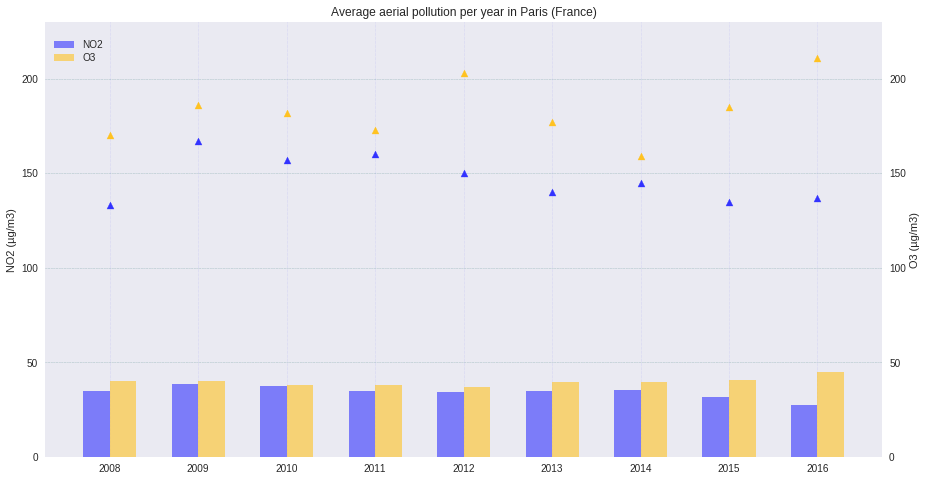

In [17]:
### Create matplotlib figure:

# Set the positions and width for the bars
pos = df_yearly.index
width = 0.3

# Plot bars
fig, ax = plt.subplots(figsize=(15, 8))
plt.bar([p - width/2 for p in pos], df_yearly['NO2'], width,
        alpha=0.6, color='#3333FF', label='NO2')
ax.grid(color='blue', linestyle=':', linewidth=0.5, alpha=0.2)
# Set the y-axis limits
ax.set_ylim(0, 230)
ax.set_ylabel('NO2 (µg/m3)')
# Set the position of the x ticks
ax.set_xticks(pos)
# Create another axes that shares the same x-axis as ax.
ax2 = ax.twinx()
plt.bar([p + width/2 for p in pos], df_yearly['O3'], width,
        alpha=0.6, color='#FFC222', label='O3')
ax2.grid(color='green', linestyle='--', linewidth=0.5, alpha=0.2)
# Set the y-axis limits
ax2.set_ylim(0, 230)
ax2.set_ylabel('O3 (µg/m3)')
# Place a legend to the upper left of the plot.
ax.legend(bbox_to_anchor=(0., 0.98), loc='upper left')
ax2.legend(bbox_to_anchor=(0., 0.95), loc='upper left')
# Append scatter plots:
plt.scatter(x=df_yearly.index, y=df_yearly['NO2_max'],
            marker="^", color='#3333FF')
plt.scatter(x=df_yearly.index, y=df_yearly['O3_max'],
            marker="^", color='#FFC222')

# Set the chart's title
ax.set_title('Average aerial pollution per year in Paris (France)')

> Les valeurs de pollution les plus critiques par année sont symbolisés dans le graphique ci-dessus par des petites pyramides.

> Ces valeurs semblent rester relativement constantes sur la période étudiée.
Les variations peuvent être causées notamment par les écarts de climats par saison d'une année sur l'autre:
- été plus nuageux en 2014? / année caniculaire en 2016?
- hiver plus glacial en 2009?

> L'observation des normes de seuils d'alerte appliquées par AirParif (lien: *https://www.airparif.asso.fr/reglementation/normes-francaises*) nous fait remarquer par ailleurs qu'aucun pic de pollution ne s'est produit entre 2008 et 2012 (d'après les données dont nous disposons...)

#### 9) Proposer une représentation par mois de la pollution à l'ozone et au dioxyde d'azote. Quel est le mois le plus pollué?

In [18]:
df_monthly = df_airParif.groupby(df_airParif.index.month).mean()
df_monthly

,NO2,O3
date,,
1,43.777439,21.875533
2,43.538490,28.089638
3,42.340925,38.871727
4,36.209306,53.038339
5,27.393752,58.483822
6,24.546105,56.992935
7,23.394468,57.958296
8,22.949405,52.413929
9,33.574074,37.995116


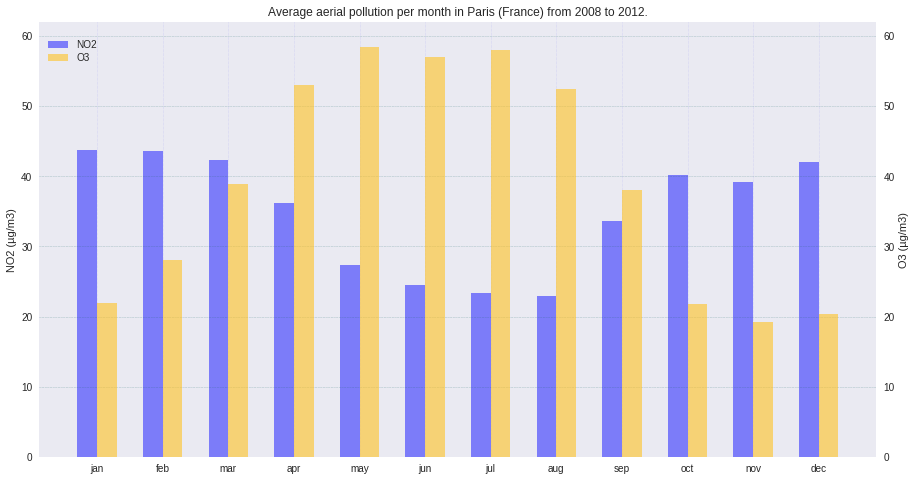

In [19]:
### Create matplotlib figure:

fig, ax = plt.subplots(figsize=(15, 8))

# Set the positions and width for the bars
pos = df_monthly.index
width = 0.3

# Plot the bars
plt.bar([p - width/2 for p in pos], df_monthly['NO2'], width,
        alpha=0.6, color='#3333FF', label='NO2')
# Set the parameters of the grid
ax.grid(color='blue', linestyle=':', linewidth=0.5, alpha=0.2)
# Set the position of the x ticks
ax.set_xticks(pos)
# Set the labels for the x ticks
ax.set_xticklabels(['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                    'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
# Set the y-axis limits
ax.set_ylim(0, 62)
# Set the label for the y axis
ax.set_ylabel('NO2 (µg/m3)')
# Create another axes that shares the same x-axis as ax.
ax2 = ax.twinx()
plt.bar([p + width/2 for p in pos], df_monthly['O3'], width,
        alpha=0.6, color='#FFC222', label='O3')
# Set the parameters of the grid
ax2.grid(color='green', linestyle='--', linewidth=0.5, alpha=0.2)
# Set the y-axis limits
ax2.set_ylim(0, 62)
ax2.set_ylabel('O3 (µg/m3)')
# Place a legend to the upper left of the plot.
ax.legend(bbox_to_anchor=(0., 0.98), loc='upper left')
ax2.legend(bbox_to_anchor=(0., 0.95), loc='upper left')

# Set the chart's title
t = 'Average aerial pollution per month in Paris (France) from 2008 to 2012.'
ax.set_title(t)

> On constate par le graphique ci-dessus que:
- la période estivale est marquée par une concentration de l'atmosphère en ozone plus élevée que pour le restant de l'année. Les mois de mai et juillet sont les plus particulièrement concernés. Cette hausse peut être expliquée par le fait que les conditions climatiques de cette saison (absence de vent et un intense soleil) sont un facteur propice à la formation de la molécule ozone dans l'atmosphère.
- la période hivernale est marquée par une concentration de l'atmoshpère en dioxyde d'azote plus élevée que pour le restant de l'année. Les mois de janvier et février sont les plus particulièrement concernés. Cette hausse peut être expliquée par le fait que l'augmentation du chauffage dans les ménages à cette saison accentue la diffusion de dioxyde d'azote dans l'air ambiant.